<a href="https://colab.research.google.com/github/moises-rb/DataScienceOne/blob/main/IA_Aplicada_DataScience%20/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [3]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Tenho três bases de dados no formato csv com os respectivos nomes: clientes, vendas e zoop_pay. Preciso antes de começar explorar os dados, conhecer as tabelas. Seguir com a escrita de um código em Python, utilizando a biblioteca Pandas. Os arquivos já foram carregados nas seguintes variáveis:
url_clientes
url_vendas
url_zoop_pay

In [4]:
import pandas as pd

# Carregar os dados
df_clientes = pd.read_csv(url_clientes)
df_vendas = pd.read_csv(url_vendas)
df_zoop_pay = pd.read_csv(url_zoop_pay)

# Exibir os campos (colunas) de cada tabela
print("\n🗂️ Tabela CLIENTES:")
print(df_clientes.columns.tolist())

print("\n🗂️ Tabela VENDAS:")
print(df_vendas.columns.tolist())

print("\n🗂️ Tabela ZOOP_PAY:")
print(df_zoop_pay.columns.tolist())



🗂️ Tabela CLIENTES:
['ID_compra', 'ID_cliente', 'cidade', 'uf', 'regiao', 'idade', 'sexo_biologico', 'cashback', 'avaliacao_compra']

🗂️ Tabela VENDAS:
['ID_compra', 'data', 'horario', 'categoria', 'preco_unitario', 'quantidade', 'frete', 'metodo_pagamento']

🗂️ Tabela ZOOP_PAY:
['ID_cliente', 'zoop_pay']


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

In [5]:
# Realizar o merge (junção) das tabelas usando a chave 'ID_compra'
df = pd.merge(
    df_vendas,
    df_clientes,
    on='ID_compra',
    how='inner'  # Mantém apenas as compras que estão nas duas tabelas
)

# Organizar as colunas na ordem especificada
colunas_ordenadas = [
    "ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade",
    "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico",
    "cidade", "uf", "regiao", "cashback", "avaliacao_compra"
]

# Reordenar o dataframe
df = df[colunas_ordenadas]

# Visualizar as primeiras linhas para conferir
df.head()


,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


In [6]:
# Realizar o merge entre o dataframe 'df' e 'df_zoop' usando 'ID_cliente' como chave
df = pd.merge(
    df,
    df_zoop_pay,
    on='ID_cliente',
    how='left'  # Mantém todos os registros de df, adicionando info da zoop quando existir
)

# Ajustar a coluna 'data' para o tipo datetime no formato 'YYYY-MM-DD'
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Conferir se ficou tudo certo
df.head()
df.dtypes

,0
ID_compra,int64
data,datetime64[ns]
horario,object
categoria,object
preco_unitario,float64
quantidade,int64
frete,float64
metodo_pagamento,object
ID_cliente,int64
idade,int64


## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

### Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Temos um DataFrame chamado "df" e queremos construir um gráfico de linha que apresente as vendas de "Panini" por mês.

Utilize apenas as colunas de "df":

data: com a data das vendas já no formato datetime (aaaa-mm-dd)
valor: com o valor de cada venda.
produto: com os produtos vendidos. Vamos utilizar o produto "Panini".
Agrupe as datas da coluna "data" por mês e agregue os dados apenas pela soma das vendas. Por fim, mude o eixo das datas para apresentar os meses em escrito.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [7]:
url = 'https://raw.githubusercontent.com/moises-rb/DataScienceOne/refs/heads/main/IA_Aplicada_DataScience/base_dados/serenatto_2sem_2023.csv'
df_pan = pd.read_csv(url)
df_pan.head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


In [8]:
df_panini = df_pan[df_pan['produto'] == 'Panini']

In [9]:
df_panini['data'] = pd.to_datetime(df_panini['data'], errors='coerce')
print(df_panini['data'].dtypes)

datetime64[ns]


<ipython-input-9-c5f44465e34c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panini['data'] = pd.to_datetime(df_panini['data'], errors='coerce')


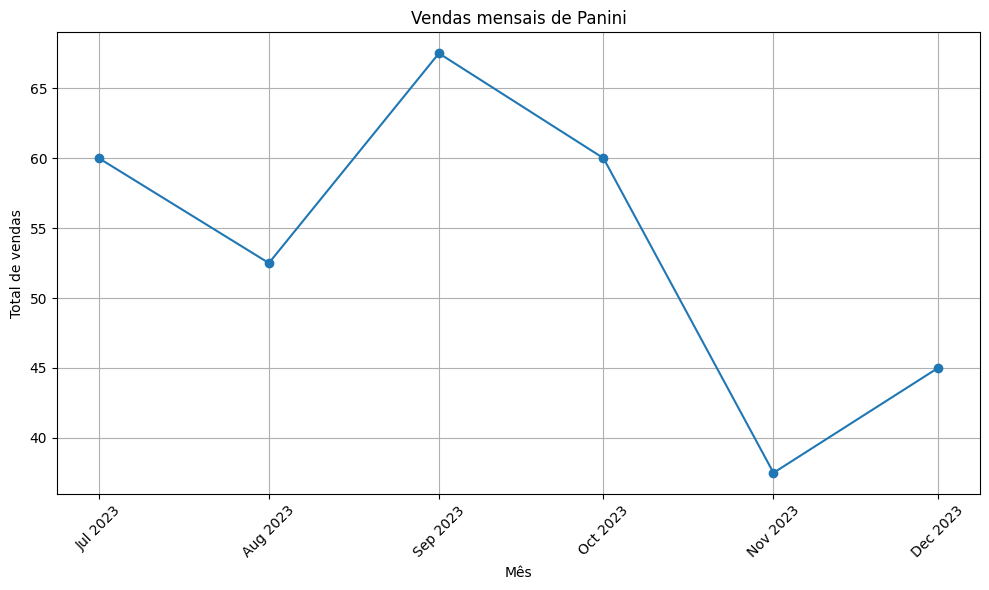

In [10]:
import matplotlib.pyplot as plt

# 🧠 Garantir que a coluna 'data' está no formato datetime
df['data'] = pd.to_datetime(df['data'])
vendas_por_mes = df_panini.groupby(df_panini['data'].dt.to_period('M'))['valor'].sum()

plt.figure(figsize=(10, 6))
plt.plot(vendas_por_mes.index.to_timestamp(), vendas_por_mes, marker='o', linestyle='-')
plt.title('Vendas mensais de Panini')
plt.xlabel('Mês')
plt.ylabel('Total de vendas')
plt.xticks(vendas_por_mes.index.to_timestamp(), [x.strftime('%b %Y') for x in vendas_por_mes.index.to_timestamp()], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Desafio 1:

Temos uma nova solicitação, para gerarmos um gráfico que apresente o faturamento das vendas por região. Este faturamento é calculado a partir do valor unitário do produto, multiplicado pela quantidade comprada e acrescentado o frete. Não tenho sugestão de gráfico, preciso que faça no visual recomendado.

O dataframe chama-se df e já esta carregado, juntamente com as bibliotecas em Python.

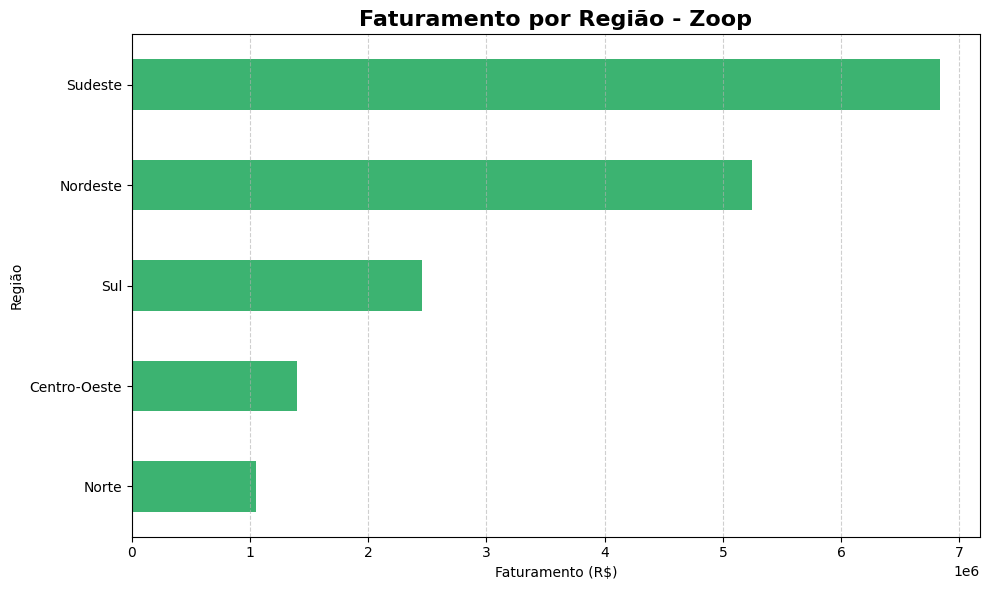

In [11]:
# ✅ Garantir que a coluna 'faturamento' está calculada corretamente
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# 🔍 Agrupar por região
faturamento_regiao = df.groupby('regiao')['faturamento'].sum().sort_values(ascending=True)

# 🎨 Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
faturamento_regiao.plot(
    kind='barh',
    color='mediumseagreen'
)

plt.title('Faturamento por Região - Zoop', fontsize=16, weight='bold')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Região')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [14]:
print(df.columns)

Index(['ID_compra', 'data', 'horario', 'categoria', 'preco_unitario',
       'quantidade', 'frete', 'metodo_pagamento', 'ID_cliente', 'idade',
       'sexo_biologico', 'cidade', 'uf', 'regiao', 'cashback',
       'avaliacao_compra', 'zoop_pay', 'faturamento'],
      dtype='object')


Desafio 2:

Temos uma nova solicitação, para gerarmos um gráfico que apresente apenas para os estados de São Paulo e Rio de Janeiro o perfil do público de acordo com o sexo biológico. Este gráfico será utilizado para uma campanha nesses estados e quero que seja feito um agrupamento ou empilhamento na apresentação visual dos dados.
O dataframe chama-se df e já esta carregado, juntamente com as bibliotecas em Python.

In [15]:
# 🧹 Padronizando os dados
df['sexo_biologico'] = df['sexo_biologico'].astype(str).str.strip().str.capitalize()
df['uf'] = df['uf'].astype(str).str.strip().str.upper()

# 🔍 Filtrar SP e RJ
filtro_estados = df[df['uf'].isin(['SP', 'RJ'])]

# ✅ Agrupar por estado e sexo biológico
perfil_sexo = filtro_estados.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

print(perfil_sexo)  # Conferir se a tabela está ok

# 🎨 Plotar gráfico de barras empilhadas
perfil_sexo.plot(
    kind='bar',
    stacked=True,
    color=['cornflowerblue', 'lightcoral', 'mediumseagreen'],
    figsize=(8,6)
)

plt.title('Perfil do Público por Sexo Biológico - SP e RJ', fontsize=16, weight='bold')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Sexo Biológico')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

Empty DataFrame
Columns: []
Index: []


TypeError: no numeric data to plot

In [17]:
print(df.dtypes)

ID_compra                    int64
data                datetime64[ns]
horario                     object
categoria                   object
preco_unitario             float64
quantidade                   int64
frete                      float64
metodo_pagamento            object
ID_cliente                   int64
idade                        int64
sexo_biologico              object
cidade                      object
uf                          object
regiao                      object
cashback                    object
avaliacao_compra             int64
zoop_pay                    object
faturamento                float64
dtype: object


In [16]:
# Conferir se o agrupamento está correto
print(perfil_sexo)

Empty DataFrame
Columns: []
Index: []


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔥 Limpeza bruta
df['sexo_biologico'] = df['sexo_biologico'].astype(str).str.strip().str.capitalize()
df['uf'] = df['uf'].astype(str).str.strip().str.upper()

# ✅ Conferir os valores únicos pra garantir que o filtro vai funcionar
print('Valores únicos de UF:', df['uf'].unique())
print('Valores únicos de sexo_biologico:', df['sexo_biologico'].unique())

# 🔍 Filtrar SP e RJ
filtro_estados = df[df['uf'].isin(['SP', 'RJ'])]

# 🚨 Conferir se há dados depois do filtro
if filtro_estados.empty:
    print("🚫 Atenção: Nenhum dado encontrado para SP e RJ. Verifique a coluna 'uf'.")
else:
    # 🎯 Agrupar os dados
    perfil_sexo = filtro_estados.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

    print(perfil_sexo)  # Verificar se a tabela está correta

    # 🎨 Plotar gráfico de barras empilhadas
    perfil_sexo.plot(
        kind='bar',
        stacked=True,
        color=['cornflowerblue', 'lightcoral', 'mediumseagreen'],
        figsize=(8,6)
    )

    plt.title('Perfil do Público por Sexo Biológico - SP e RJ', fontsize=16, weight='bold')
    plt.xlabel('Estado')
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=0)
    plt.legend(title='Sexo Biológico')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.show()


Valores únicos de UF: ['RIO GRANDE DO SUL' 'SÃO PAULO' 'RONDÔNIA' 'PERNAMBUCO' 'BAHIA'
 'RIO DE JANEIRO' 'PARANÁ' 'RIO GRANDE DO NORTE' 'PARÁ' 'PARAÍBA' 'GOIÁS'
 'ACRE' 'CEARÁ' 'MINAS GERAIS' 'DISTRITO FEDERAL' 'SANTA CATARINA'
 'ESPÍRITO SANTO' 'PIAUÍ' 'MATO GROSSO' 'TOCANTINS' 'SERGIPE' 'MARANHÃO'
 'MATO GROSSO DO SUL' 'AMAZONAS' 'ALAGOAS' 'AMAPÁ' 'RORAIMA']
Valores únicos de sexo_biologico: ['Masculino' 'Feminino']
🚫 Atenção: Nenhum dado encontrado para SP e RJ. Verifique a coluna 'uf'.


sexo_biologico  Feminino  Masculino
uf                                 
RIO DE JANEIRO       303        267
SÃO PAULO            838        662


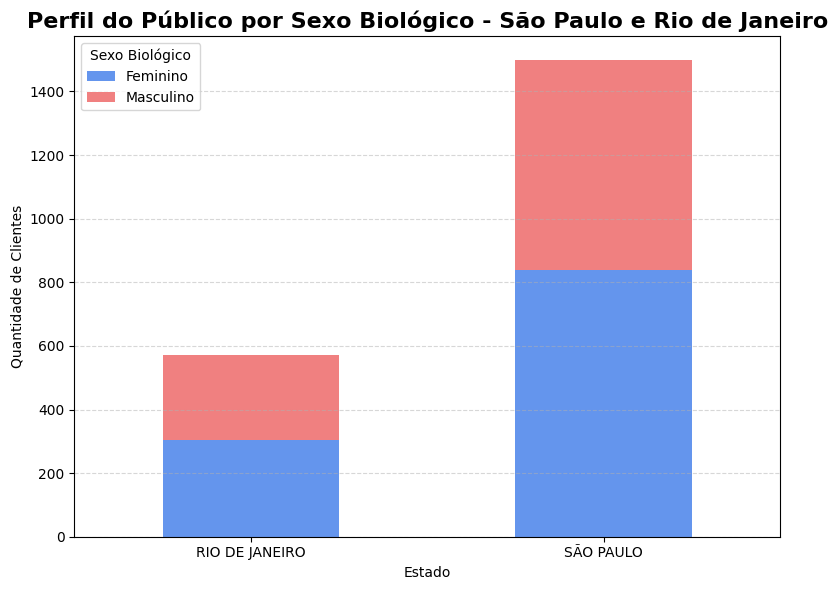

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔥 Conferir que os dados estão limpos (mas nem precisa mexer no sexo, já tá bonitão)
df['uf'] = df['uf'].str.strip().str.upper()

# 📌 Filtrar apenas São Paulo e Rio de Janeiro
df_filtrado = df[df['uf'].isin(['SÃO PAULO', 'RIO DE JANEIRO'])]

# 🚨 Checar se o filtro trouxe dados
if df_filtrado.empty:
    print("🚫 Nenhum dado encontrado para SP e RJ. Verifique os dados.")
else:
    # 🎯 Agrupar os dados
    perfil = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

    print(perfil)  # Conferência dos dados agrupados

    # 🎨 Plotar gráfico de barras empilhadas
    perfil.plot(
        kind='bar',
        stacked=True,
        color=['cornflowerblue', 'lightcoral'],
        figsize=(8,6)
    )

    plt.title('Perfil do Público por Sexo Biológico - São Paulo e Rio de Janeiro', fontsize=16, weight='bold')
    plt.xlabel('Estado')
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=0)
    plt.legend(title='Sexo Biológico')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.show()


## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

In [20]:
import pandas as pd
import plotly.express as px

# Supondo que você já tenha o DataFrame df
# Filtrar as colunas desejadas
vendas_2023 = df[['regiao', 'uf', 'faturamento']]

# Criar o gráfico Treemap
fig = px.treemap(vendas_2023, path=['regiao', 'uf'], values='faturamento', color='regiao',
                 color_discrete_map={'Centro-Oeste': '#0081a7',
                                     'Nordeste': '#00afb9',
                                     'Norte': '#fdfcdc',
                                     'Sudeste': '#fed9b7',
                                     'Sul': '#f07167'}
                 )

# Atualizando o layout para adicionar título
fig.update_layout(width=1400, height=600, title='Faturamento Total por Região e Estado', margin = dict(t=25, l=0, r=0, b=0))

# Adicionar os valores dentro dos retângulos
fig.update_traces(textinfo='label+value')

# Exibir o gráfico
fig.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

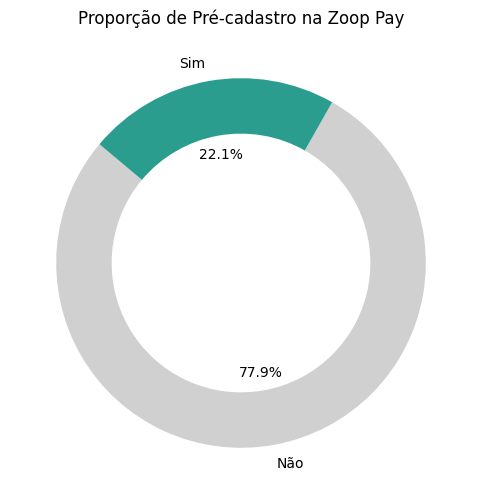

In [21]:
# Contabiliza a quantidade de usuários que realizaram o pré-cadastro na Zoop Pay
pre_cadastro_counts = df_zoop_pay['zoop_pay'].value_counts()

# Define as cores para cada valor
colors = ['#2a9d8f' if label == 'Sim' else '#d0d0d0' for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(8, 6))
plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Adiciona um título ao gráfico
plt.title('Proporção de Pré-cadastro na Zoop Pay')

# Exibe o gráfico
plt.show()

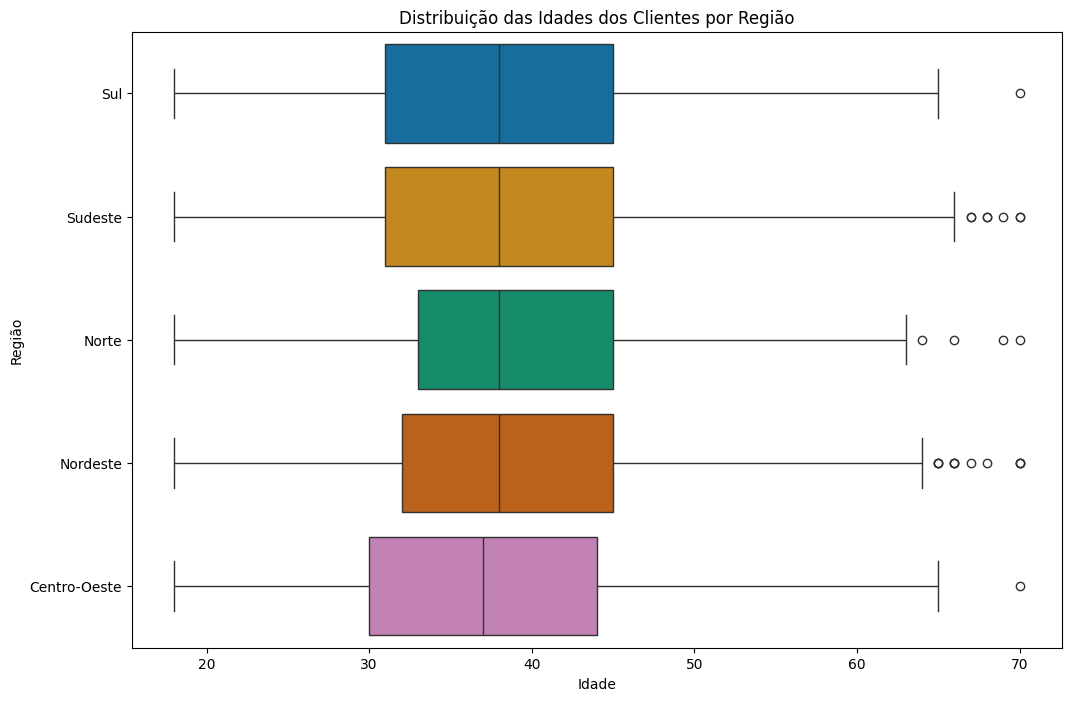

In [22]:
import seaborn as sns

# Criação do boxplot
plt.figure(figsize=(12, 8))  # Define o tamanho do gráfico
boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind", hue='regiao')  # Cria o boxplot

# Adiciona títulos e rótulos aos eixos
plt.title('Distribuição das Idades dos Clientes por Região')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Região')  # Rótulo do eixo Y

# Exibe o gráfico
plt.show()

## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [23]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

##### Gráfico sem refinamento

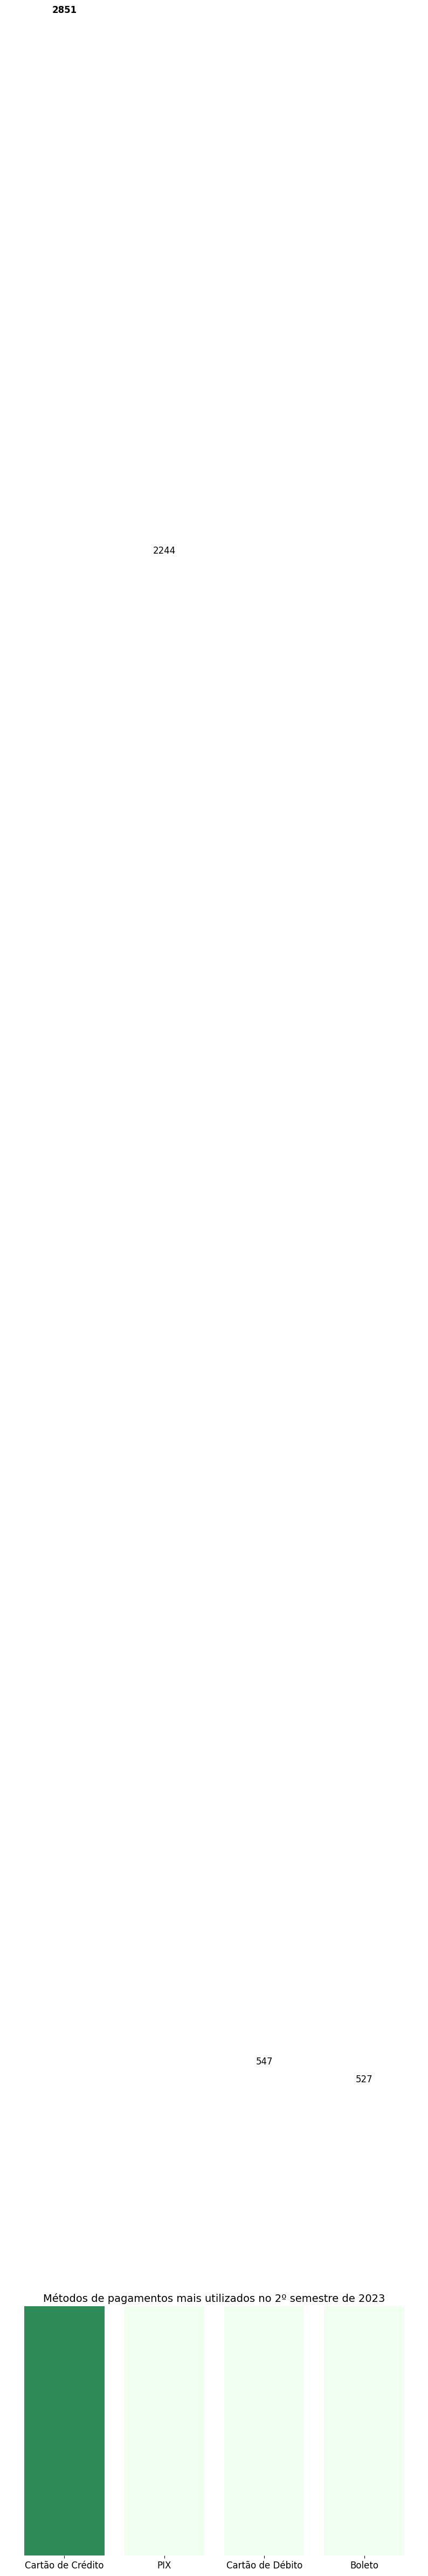

In [27]:
metodos_pagamento = df['metodo_pagamento'].value_counts()
metodo_mais_utilizado = metodos_pagamento.idxmax()
cores = ['honeydew'] * len(metodos_pagamento)
cores[metodos_pagamento.index.get_loc(metodo_mais_utilizado)] = 'seagreen'

plt.figure(figsize=(10, 6))
plt.bar(metodos_pagamento.index, metodos_pagamento.values, color=cores)

for i, valor in enumerate(metodos_pagamento.values):
    plt.text(i, valor + 5, str(valor), ha='center', fontsize=12, weight='bold' if valor == metodos_pagamento.max() else 'normal')

plt.title('Métodos de pagamentos mais utilizados no 2º semestre de 2023', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([])
plt.ylim(0, 280)
plt.xlabel('')
plt.ylabel('')
plt.gca().spines[['top', 'right','left', 'bottom']].set_visible(False)
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!


#### Desafio 2:

##### Gráfico sem refinamento

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!